Topic:        Challenge Set 1
Subject:      Explore MTA turnstile data
Date:         07/09/2018
Name:         Christopher Bui
Worked with:  Jessica, Johnathan, Lauren

In [1]:
import sys
print("Python Version:", sys.version)

Python Version: 3.6.1 |Anaconda 4.4.0 (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


### Challenge 1

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [227]:
#combine 3 mta turnstile csv's into 1 dataframe

url_list = ['180616','180623','180630']
frames = []

for i in url_list:
    url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'.format(i)
    frames.append(pd.read_csv(url))

df = pd.concat(frames)

#fix the 'EXITS' column formatting
new_columns = df.columns.str.strip()
df.columns = new_columns

df.columns
df.head(1)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,00:00:00,REGULAR,6649975,2254182


### Challenge 2

In [228]:
#combine DATE and TIME columns

df['DATE TIME'] = df['DATE'] + ' ' + df['TIME']

In [229]:
#convert 'DATE TIME' column values to datetime type

df['DATE TIME'] = df['DATE TIME'].apply(lambda x: datetime.datetime.strptime(x,'%m/%d/%Y %H:%M:%S'))

In [230]:
#clean up dataframe
df.drop(['DATE','TIME'], axis=1, inplace=True)
df.dropna(axis=1, inplace=True)
df.rename(columns={'C/A':'CA'},inplace=True)

df['DATE'] = df['DATE TIME'].dt.date

df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590354 entries, 0 to 196689
Data columns (total 11 columns):
CA           590354 non-null object
UNIT         590354 non-null object
SCP          590354 non-null object
STATION      590354 non-null object
LINENAME     590354 non-null object
DIVISION     590354 non-null object
DESC         590354 non-null object
ENTRIES      590354 non-null int64
EXITS        590354 non-null int64
DATE TIME    590354 non-null datetime64[ns]
DATE         590354 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 54.0+ MB


In [231]:
df.to_csv('mta_data.csv')

In [232]:
df.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,DATE TIME,DATE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6649975,2254182,2018-06-09 00:00:00,2018-06-09
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6650004,2254188,2018-06-09 04:00:00,2018-06-09
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6650022,2254209,2018-06-09 08:00:00,2018-06-09
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6650118,2254289,2018-06-09 12:00:00,2018-06-09
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6650332,2254345,2018-06-09 16:00:00,2018-06-09


### Challenge 3

There are counts for every 4 hours.

In [233]:
#trying out aggregration function
def daily_entries(x):
    values = x.values
    if len(values) > 2:
        return values[-1] - values[0]
    else:
        return None
    

In [279]:
df['TURNSTILE'] = df['CA'] + ' ' + df['SCP']

df = df.sort_values(['TURNSTILE','DATE'])
df_day = df.groupby(['TURNSTILE','DATE'])


#find daily entries
df_daily_entries = df_day['ENTRIES'].agg(daily_entries).reset_index()
df_daily_entries.head()

,TURNSTILE,DATE,ENTRIES
0,A002 02-00-00,2018-06-09,604.0
1,A002 02-00-00,2018-06-10,480.0
2,A002 02-00-00,2018-06-11,1302.0
3,A002 02-00-00,2018-06-12,1246.0
4,A002 02-00-00,2018-06-13,1190.0


### Challenge 4

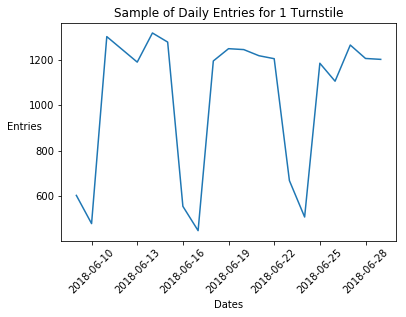

In [235]:
#select for 1 turnstile
df_turnstile = df_daily_entries[df_daily_entries['TURNSTILE'] == 'A002 02-00-00']

df_turnstile.columns
x_dates = df_turnstile['DATE']
y_entries = df_turnstile['ENTRIES']

plt.title('Sample of Daily Entries for 1 Turnstile')
plt.xlabel('Dates')
plt.ylabel('Entries',rotation=0)
plt.plot(x_dates,y_entries)
plt.xticks(rotation=45)
plt.show()


### Challenge 5

In [282]:
df2 = df.sort_values(['DATE','TURNSTILE'])
df2_group_turnstiles = df2.groupby(['CA','UNIT','STATION','DATE','TURNSTILE'])

df2_entries = df2_group_turnstiles['ENTRIES'].agg(daily_entries).reset_index()
df2_entries.head()

df2_sum_turnstiles = df2_entries.groupby(['CA','UNIT','STATION','DATE']).sum()
df2_sum_turnstiles.head()

ENTRIES
CA   UNIT STATION DATE               
A002 R051 59 ST   2018-06-09   6264.0
                  2018-06-10   5323.0
                  2018-06-11  11183.0
                  2018-06-12  11546.0
                  2018-06-13  11420.0

### Challenge 6

In [277]:
df2_station_turnstiles = df2.groupby(['STATION','DATE','TURNSTILE'])
df2_station_entries = df2_station_turnstiles['ENTRIES'].agg(daily_entries).reset_index()

df2_station_entries.head()
df2_station_sum = df2_station_entries.groupby(['STATION','DATE']).sum()

df2_station_sum.head()

ENTRIES
STATION DATE               
1 AV    2018-06-09  15092.0
        2018-06-10  11672.0
        2018-06-11  18084.0
        2018-06-12  18848.0
        2018-06-13  18948.0

### Challenge 7

            ENTRIES
DATE               
2018-06-09  15092.0
2018-06-10  11672.0
2018-06-11  18084.0
2018-06-12  18848.0
2018-06-13  18948.0


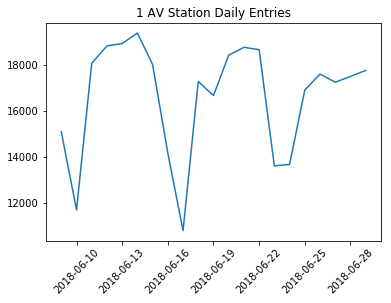

In [298]:
AV1 = df2_station_sum.loc['1 AV']
print(AV1.head())

x_station = AV1.index
y_station = AV1['ENTRIES']

plt.plot(x_station,y_station)
plt.xticks(rotation = 45)
plt.title('1 AV Station Daily Entries')
plt.show()

### Challenge 8

In [306]:
print(AV1)

            ENTRIES
DATE               
2018-06-09  15092.0
2018-06-10  11672.0
2018-06-11  18084.0
2018-06-12  18848.0
2018-06-13  18948.0
2018-06-14  19411.0
2018-06-15  18035.0
2018-06-16  14160.0
2018-06-17  10770.0
2018-06-18  17287.0
2018-06-19  16676.0
2018-06-20  18440.0
2018-06-21  18785.0
2018-06-22  18682.0
2018-06-23  13603.0
2018-06-24  13664.0
2018-06-25  16913.0
2018-06-26  17616.0
2018-06-27  17258.0
2018-06-28  17511.0
2018-06-29  17774.0


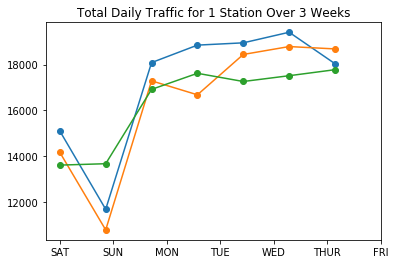

In [343]:
#0-7, 7-14, 14,21
week1_date = list(range(7))
week2_date = list(range(7))
week3_date = list(range(7))

week1_entries = y_station[0:7]
week2_entries = y_station[7:14]
week3_entries = y_station[14:21]

plt.plot(week1_date, week1_entries, marker='o')
plt.plot(week2_date, week2_entries, marker='o')
plt.plot(week3_date, week3_entries, marker='o')

xspace = np.linspace(0,7,7)
days = ['SAT','SUN','MON','TUE','WED','THUR','FRI']
plt.xticks(xspace,days)
plt.title('Total Daily Traffic for 1 Station Over 3 Weeks')
    
plt.show()
    
    

### Challenge 9

In [356]:
all_stations = df2_station_entries.groupby(['STATION']).sum()
all_stations.head()

all_stations.sort_values('ENTRIES', ascending=False,inplace=True)
all_stations = all_stations[all_stations['ENTRIES'] > 0]

all_stations.head()

,ENTRIES
STATION,
182-183 STS,1.482225e+09
190 ST,1.431714e+09
BRONX PARK EAST,9.860595e+08
KINGSBRIDGE RD,7.021487e+08
TREMONT AV,1.003976e+08


### Challenge 10

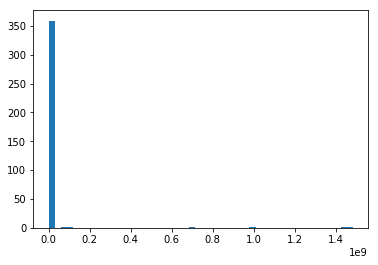

In [374]:
indices = range(len(all_stations))
all_stations_entries = all_stations['ENTRIES']
plt.hist(all_stations_entries, bins = 50)
plt.show()